### Installing and Importing dependencies

In [ ]:
!pip install wordcloud
!pip install spacy
!pip install --upgrade spacy pydantic typing-extensions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.9/407.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.16.3
    Uninstalling pydantic_core-2.16.3:
      Successfully uninstalled pydantic_core-2.16.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4


In [ ]:
!pip install textblob

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install xgboost

In [1]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Data Exploration

In [16]:
df=pd.read_csv("IMDB Dataset.csv")

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

There are no missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

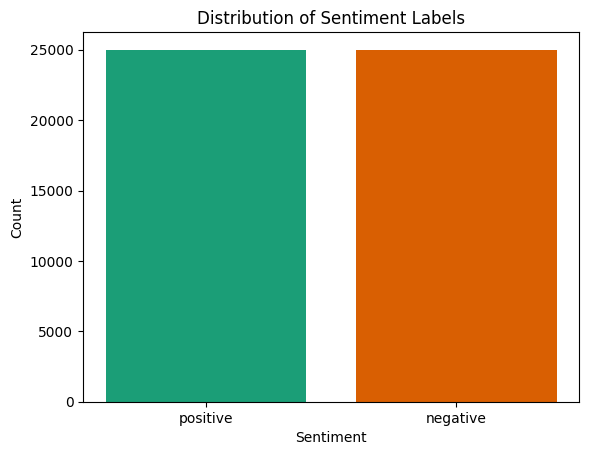

In [8]:
# Check the distribution of sentiment labels
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

The dataset is balanced

In [17]:
df1=df.copy()

## Data preprocessing

Removing English Abreviations

In [18]:
def remove_abbriviations(text):
    text = re.sub(r'won\'t', 'will not', text)
    text = re.sub(r'can\'t', 'cannot', text)
    text = re.sub(r'i\'m', 'i am', text)
    text = re.sub(r'ain\'t', 'is not', text)
    text = re.sub(r'(\w+)\'ll', '\g<1> will', text)
    text = re.sub(r'(\w+)n\'t', '\g<1> not', text)
    text = re.sub(r'(\w+)\'ve', '\g<1> have', text)
    text = re.sub(r'(\w+)\'s', '\g<1> is', text)
    text = re.sub(r'(\w+)\'re', '\g<1> are', text)
    text = re.sub(r'(\w+)\'d', '\g<1> would', text)
    text = re.sub(r'don\'t', 'do not', text)
    text = re.sub(r'doesn\'t', 'does not', text)
    text = re.sub(r'didn\'t', 'did not', text)
    text = re.sub(r'haven\'t', 'have not', text)
    text = re.sub(r'hasn\'t', 'has not', text)
    text = re.sub(r'hadn\'t', 'had not', text)
    text = re.sub(r'wouldn\'t', 'would not', text)
    text = re.sub(r'shouldn\'t', 'should not', text)
    text = re.sub(r'mustn\'t', 'must not', text)
    text = re.sub(r'needn\'t', 'need not', text)
    text = re.sub(r'it\'s', 'it is', text)
    text = re.sub(r'they\'re', 'they are', text)
    text = re.sub(r'we\'re', 'we are', text)
    text = re.sub(r'you\'re', 'you are', text)
    text = re.sub(r'he\'s', 'he is', text)
    text = re.sub(r'she\'s', 'she is', text)
    text = re.sub(r'we\'ll', 'we will', text)
    text = re.sub(r'you\'ll', 'you will', text)
    text = re.sub(r'they\'ll', 'they will', text)
    text = re.sub(r'isn\'t', 'is not', text)
    text = re.sub(r'doesn\'t', 'does not', text)
    return text

In [19]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text


In [20]:
#removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [10]:
from nltk.stem import WordNetLemmatizer

def simple_lemmatizer(text):
    # Initialize WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word in the text
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


In [11]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove abbreviations
    text = remove_abbriviations(text)
    # Remove HTML tags and noisy text
    text = denoise_text(text)
    # Remove special characters
    text = remove_special_characters(text)
    # Remove stopwords
    text = remove_stopwords(text)
    # Lemmatization
    text = simple_lemmatizer(text)

    return text

In [ ]:
df['review'] = df['review'].apply(preprocess_text)

In [17]:
df['review']

0        one reviewer mentioned watching 1 oz episode h...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 50000, dtype: object

## EDA

In [19]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# y_encoded = encoder.fit_transform(df['sentiment'].values.reshape(-1,1))

In [20]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

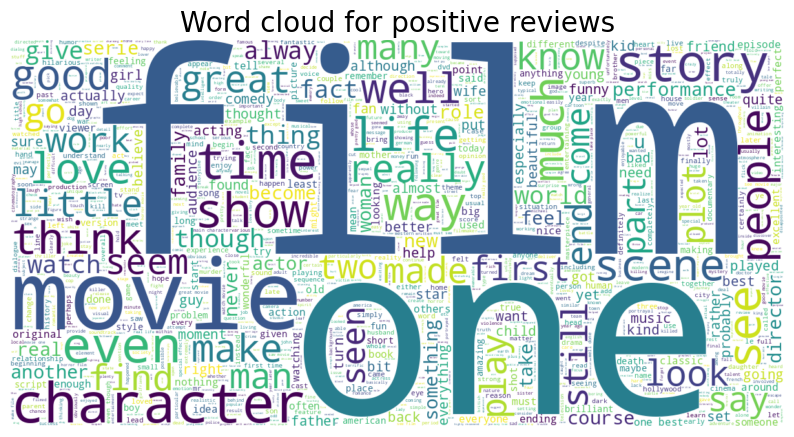

In [21]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 'positive']['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

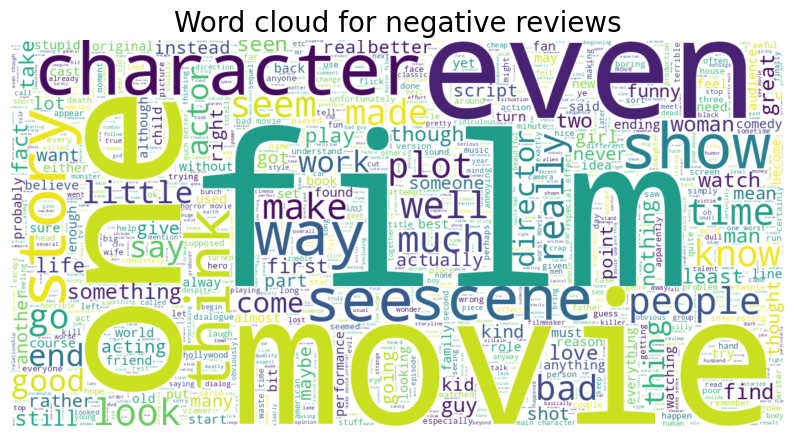

In [22]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 'negative']['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

In [ ]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()) )
df['character_count'] = df['review'].apply(lambda x: len(x))
df

,review,sentiment,word_count,character_count
0,one reviewer mentioned watching 1 oz episode h...,1,164,1098
1,wonderful little production filming technique ...,1,84,639
2,thought wonderful way spend time hot summer we...,1,85,580
3,basically family little boy jake think zombie ...,0,64,433
4,petter mattei love time money visually stunnin...,1,125,848
...,...,...,...,...
49995,thought movie right good job creative original...,1,78,508
49996,bad plot bad dialogue bad acting idiotic direc...,0,56,399
49997,catholic taught parochial elementary school nu...,0,114,800
49998,going disagree previous comment side maltin on...,0,113,811


In [23]:
X=df['review']
# split into train and test sets To prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=1)


## TF-IDF Vectorizer

Text transformation using TF-IDF or BOW should be performed after splitting the data into train and test in such a manner that we fit the data on the train corpus and transform the test corpus. This will prevent the data leakage problem.









In [24]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
#Only for the reviews
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shapes of the resulting TF-IDF matrices and data splits
print('Training data shape (TF-IDF):', X_train_tfidf.shape, y_train.shape)
print('Testing data shape (TF-IDF):', X_test_tfidf.shape, y_test.shape)

Training data shape (TF-IDF): (33500, 5000) (33500,)
Testing data shape (TF-IDF): (16500, 5000) (16500,)


## Predictive modeling with machine learning

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
# Step 4: Train the SVM model
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
# Step 6: Predict sentiment on new data
predictionLr=lr.predict(X_test_tfidf)
# Step 7: Generate the classification report to evaluate the model
print(classification_report(y_test, predictionLr))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8227
           1       0.87      0.90      0.89      8273

    accuracy                           0.88     16500
   macro avg       0.88      0.88      0.88     16500
weighted avg       0.88      0.88      0.88     16500



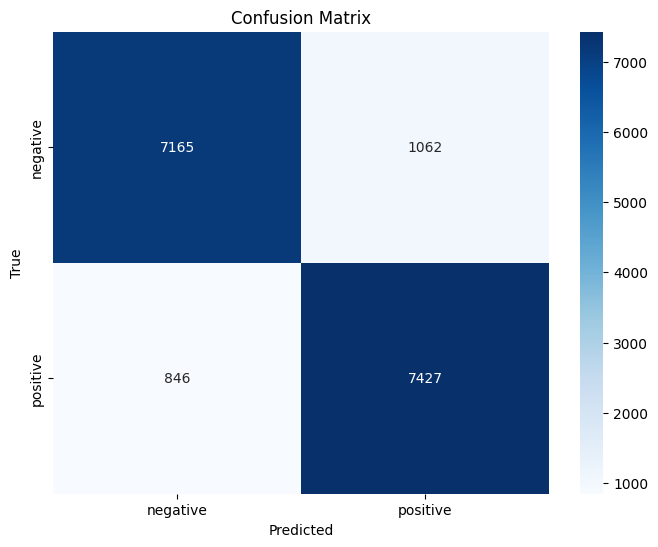

In [26]:
# Calculate the confusion matrix
conf_matrixLR = confusion_matrix(y_test, predictionLr)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixLR, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
# Step 4: Train the SVM model
mnb= MultinomialNB()
mnb.fit(X_train_tfidf,y_train)
# Step 6: Predict sentiment on new data
predictionNB=mnb.predict(X_test_tfidf)
# Step 7: Generate the classification report to evaluate the model
print(classification_report(y_test, predictionNB))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      8227
           1       0.85      0.86      0.86      8273

    accuracy                           0.86     16500
   macro avg       0.86      0.86      0.86     16500
weighted avg       0.86      0.86      0.86     16500



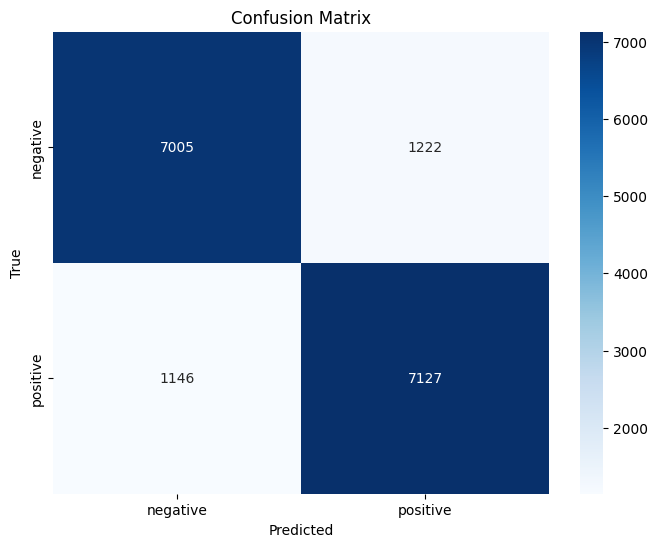

In [28]:
# Calculate the confusion matrix
conf_matrixNB = confusion_matrix(y_test, predictionNB)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixNB, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### SVM

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# Step 4: Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
# Step 6: Predict sentiment on new data
predictions = svm.predict(X_test_tfidf)
# Step 7: Generate the classification report to evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8227
           1       0.88      0.90      0.89      8273

    accuracy                           0.88     16500
   macro avg       0.88      0.88      0.88     16500
weighted avg       0.88      0.88      0.88     16500



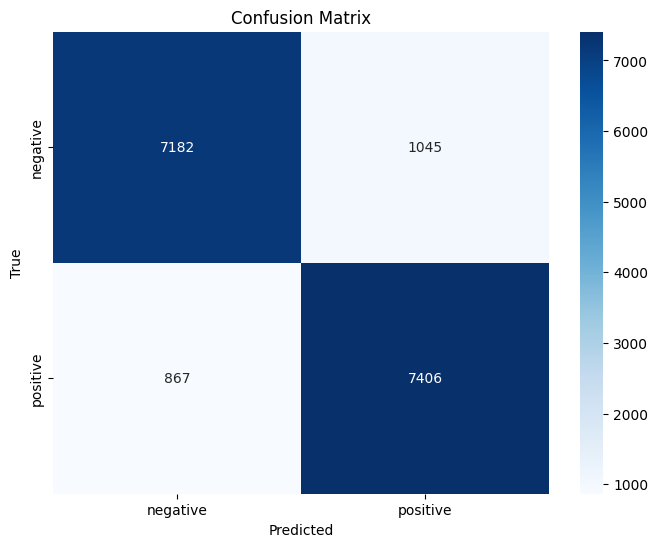

In [30]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### XGBOOST

In [31]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report

# Create and train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train)

# Predict on the test data
predictionXGB = xgb.predict(X_test_tfidf)

# Generate the classification report to evaluate the model
print(classification_report(y_test, predictionXGB))


              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8227
           1       0.84      0.88      0.86      8273

    accuracy                           0.86     16500
   macro avg       0.86      0.86      0.86     16500
weighted avg       0.86      0.86      0.86     16500



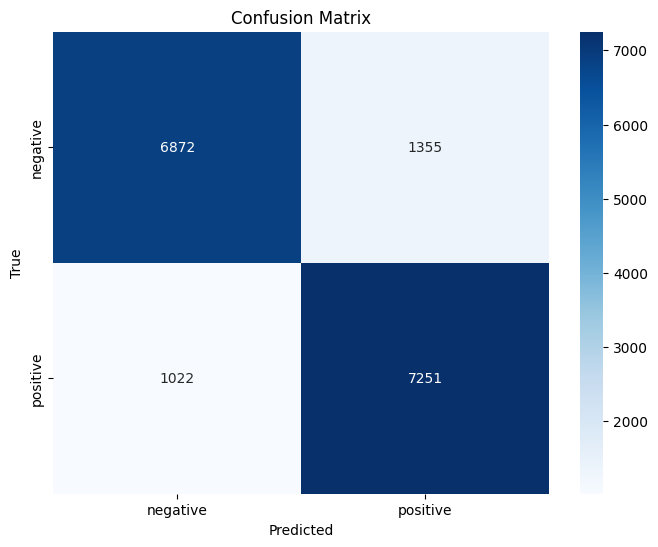

In [32]:
# Calculate the confusion matrix
conf_matrixGB = confusion_matrix(y_test, predictionXGB)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixGB, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Save Model

In [38]:
import pickle

# Open file for model and vectorizer
file_model = open("model.pkl", "wb")
file_vectorizer = open("vectorizer.pkl", "wb")

# Dumping information into the files
pickle.dump(tfidf_vectorizer, file_vectorizer)
pickle.dump(svm, file_model)


In [39]:
# Open file for model and vectorizer
with open("model.pkl", "rb") as file_model, open("vectorizer.pkl", "rb") as file_vectorizer:
    # Load the serialized objects
    loaded_tfidf_vectorizer = pickle.load(file_vectorizer)
    loaded_model = pickle.load(file_model)

In [40]:
def predict_sentiment(review):
    # Preprocess the review
    review = preprocess_text(review)
    # Convert the preprocessed review into TF-IDF features using the loaded vectorizer
    review_tfidf = loaded_tfidf_vectorizer.transform([review])
    # Predict sentiment using the loaded model
    prediction = loaded_model.predict(review_tfidf)
    # Convert prediction to sentiment label
    sentiment = "positive" if prediction[0] == 1 else "negative"
    return sentiment


In [41]:
phrase1 = "I loved the movie, it was fantastic!"
phrase2 = "The movie was terrible, I hated it."

In [42]:
print("Sentiment of phrase 1:", predict_sentiment(phrase1))
print("Sentiment of phrase 2:", predict_sentiment(phrase2))

Sentiment of phrase 1: positive
Sentiment of phrase 2: negative
